## Problem 3 ##
Deliverable: write a likelihood model that provides a reasonable fit for this data
- plot simulations from this model to assess its viability
- fit a gompertz function to this data
- provide the best estimate for parameters a, b, and c

- wrtie an optimization problem to estimate them using max likelihood
- extend this model to a bayesian inference problem
- write as a penalized likelihood prob
- write as a least squares optimization problem

##### References
1. https://github.com/markdregan/Bayesian-Modelling-in-Python
2. https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html 
3. https://m-clark.github.io/models-by-example/penalized-maximum-likelihood.html 


I will assume normal noise in the gompertz pdf for the data.
We start with problem 
### 3a


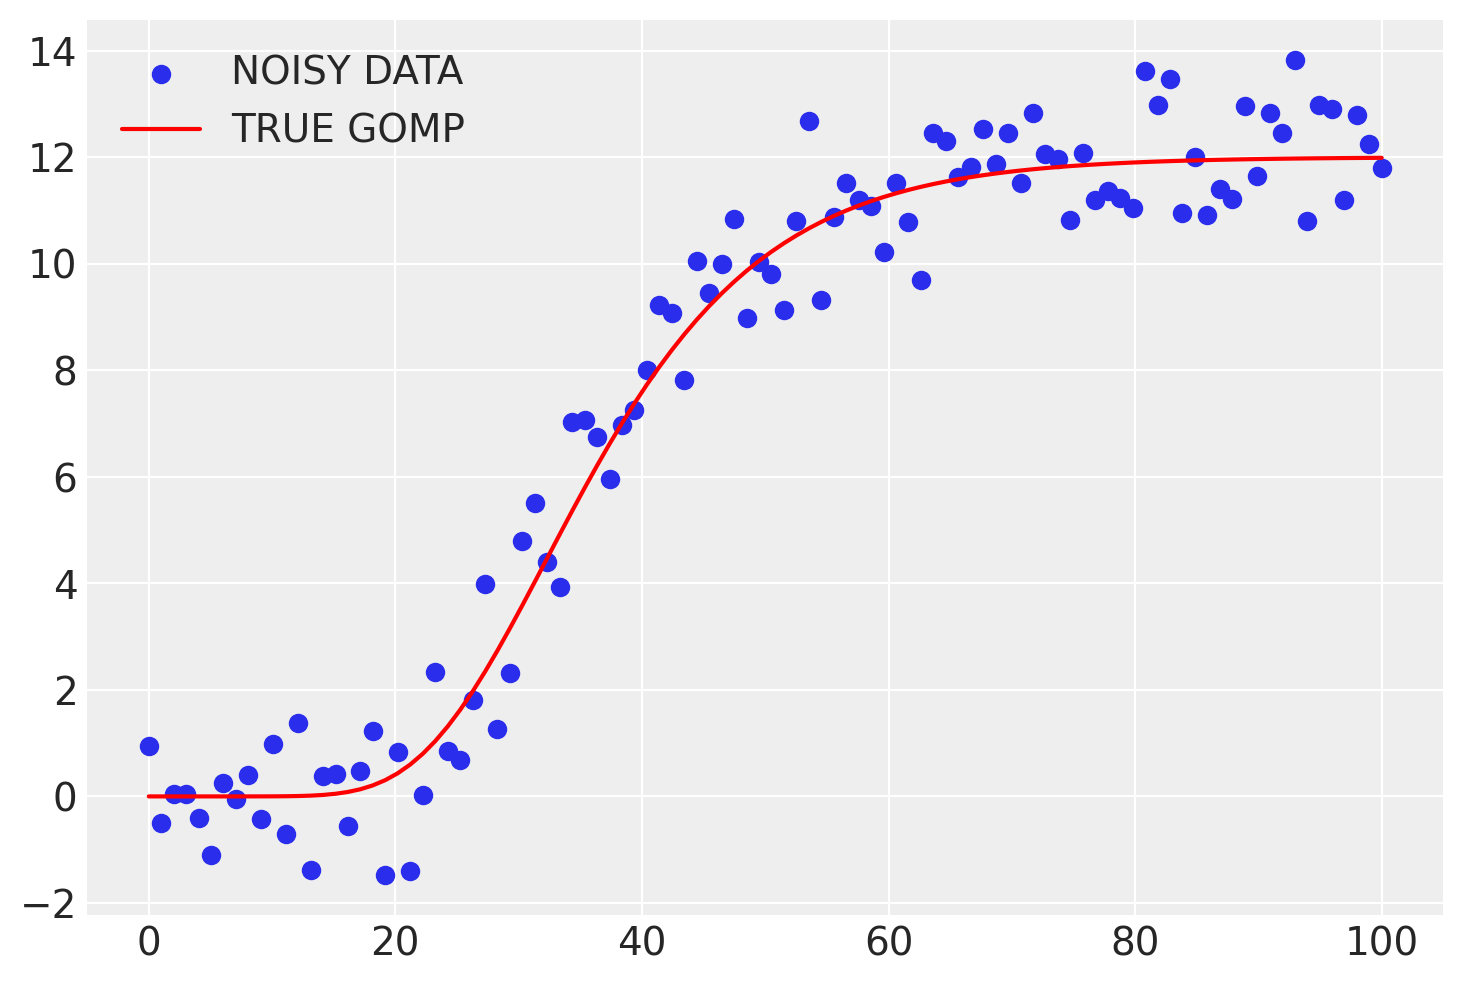

In [48]:
# write a likelihood model for a gompertz function 
import os
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# GOMP LIKELIHOOD
def gomp(a, b, c, x):
    y_i = a * np.exp(-b * np.exp(-c * x))
    return y_i

# arb data
x_values = np.linspace(0, 100, 100)
noise = np.random.normal(0, 0.8, size=len(x_values))

# GOMP SHAPE
aa, bb, cc = 12, 25, 0.1
yy = gomp(aa, bb, cc, x_values)

# NOISY GOMP
y_values = yy + noise

# PLOT NOISY GOMP
plt.scatter(x_values, y_values, label="NOISY DATA")
plt.plot(x_values, yy, color='r', label="TRUE GOMP")
plt.legend()
plt.show()
    

MLE estimates: a=12.183537669918747, b=15.044866091935125, c=0.08616841471759, sigma=0.9863302254460895


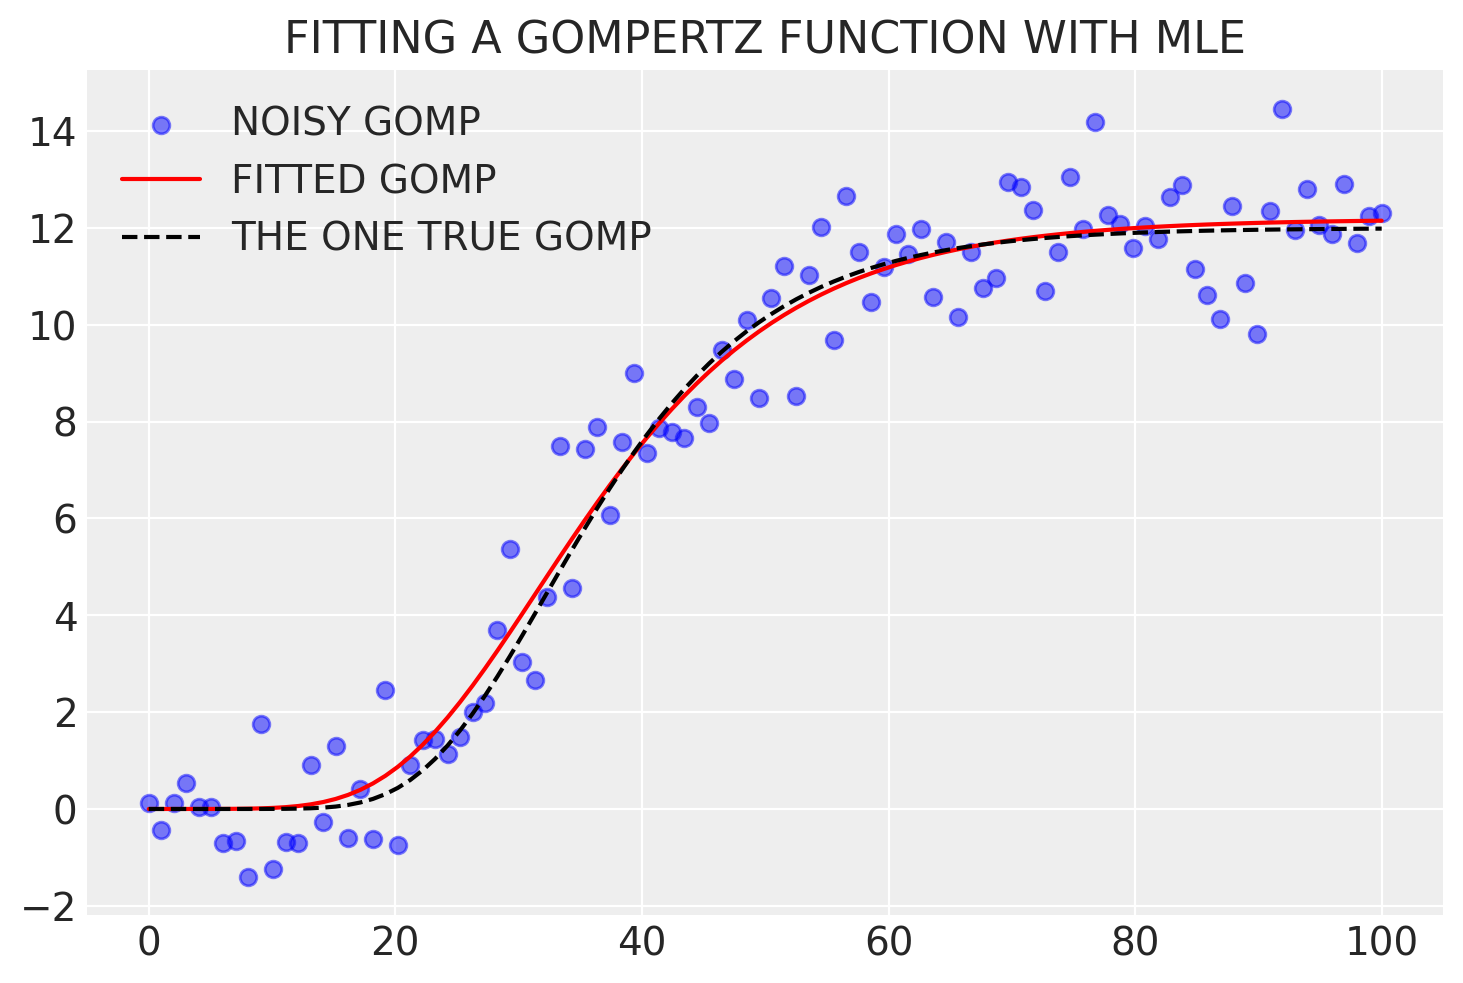

In [56]:
### WRITE LIKELIHOOD WITH MLE ###
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Gompertz function
def gomp(a, b, c, x):
    y_i = a * np.exp(-b * np.exp(-c * x))
    return y_i

# log likelihood for mse
def nll_1(parameters, x, y_obs):
    a, b, c, sigma = parameters
    y_pred = gomp(a, b, c, x)
    # 
    nll = 0.5 * np.sum(((y_obs - y_pred) / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2))
    return nll

# arb data
x_values = np.linspace(0, 100, 100)
noise = np.random.normal(0, 0.8, size=len(x_values))

# GOMP SHAPE
aa, bb, cc = 12, 25, 0.1
# Generate some arbitrary noisy Gompertz data
x_values = np.linspace(0, 100, 100)
# true shapes
aa, bb, cc = 12, 25, 0.1  # 
# true gomp
yy = gomp(aa, bb, cc, x_values) #
# mysterynoise
noise = np.random.normal(0, 1, size=len(x_values))  # 

# noisy GOMP
y_values = yy + noise

# Initial guess for mle
initial_guess = [10, 15, 0.05, 1]  
# optimization in scipy
result = minimize(nll_1, initial_guess, args=(x_values, y_values), method='L-BFGS-B')

# what do we have here
a_mle, b_mle, c_mle, sigma_mle = result.x
print(f"MLE estimates: a={a_mle}, b={b_mle}, c={c_mle}, sigma={sigma_mle}")

# Plot the noisy data and the fitted Gompertz curve
plt.scatter(x_values, y_values, label="NOISY GOMP", color="blue", alpha=0.5)
plt.plot(x_values, gomp(a_mle, b_mle, c_mle, x_values), color='red', label="FITTED GOMP")
plt.plot(x_values, yy, color='black', linestyle='--', label="THE ONE TRUE GOMP")
plt.legend()
plt.title("FITTING A GOMPERTZ FUNCTION WITH MLE")
plt.show()


BELOW HERE IS PLAYGROUND

\text{LS} = \sum (y_{\text{obs}} - y_{\text{pred}})^2


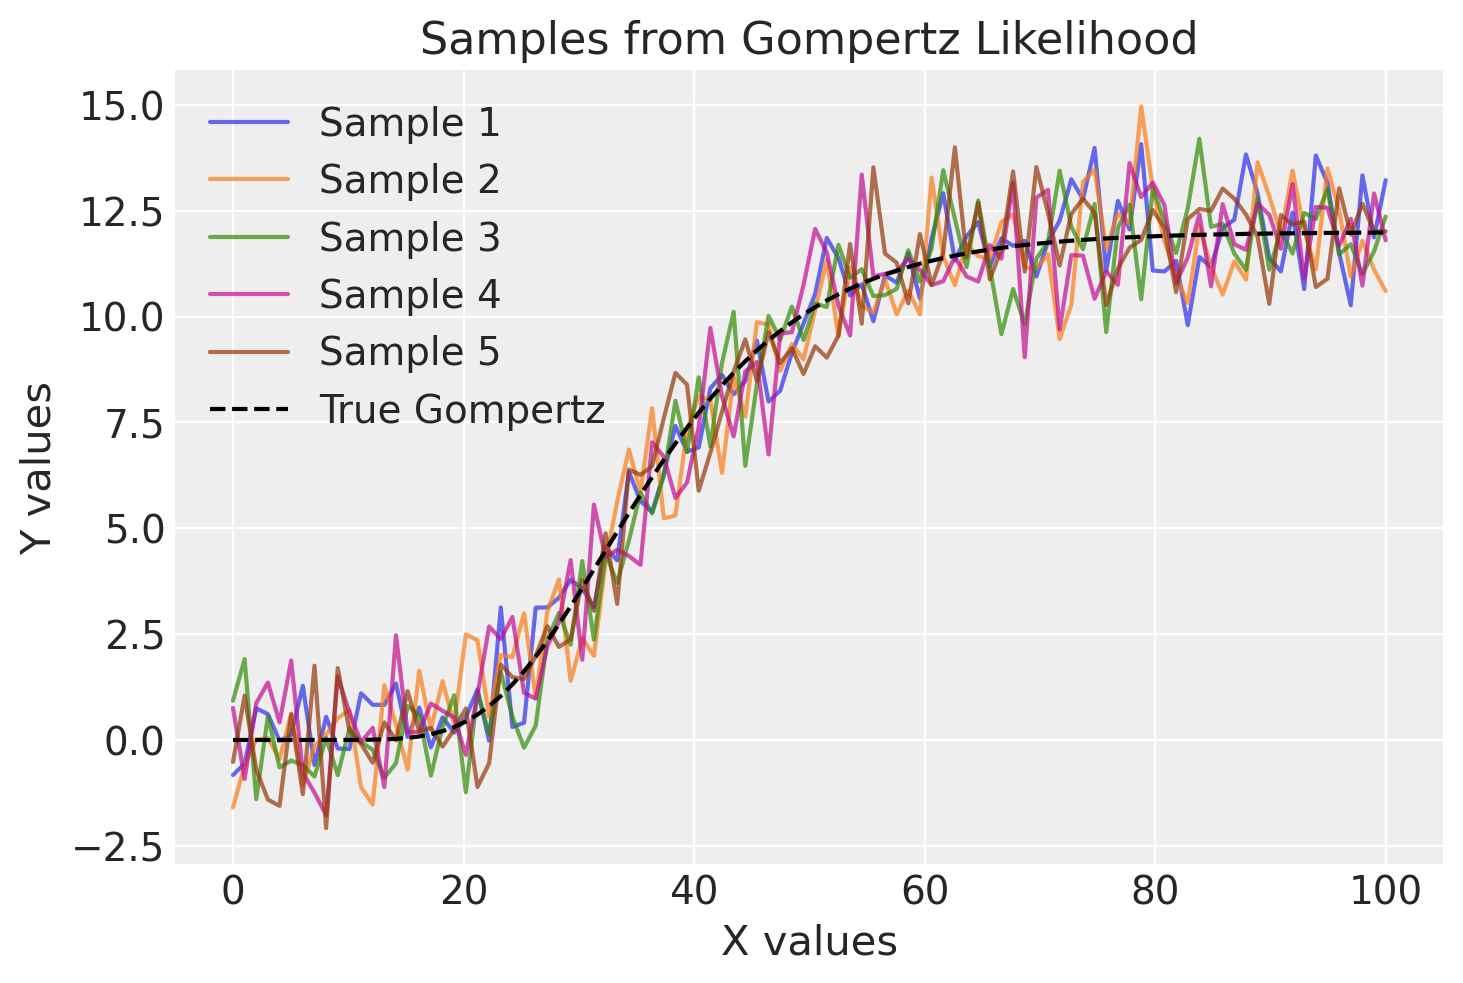

In [62]:
import numpy as np

# Gompertz growth model
def gomp(a, b, c, x):
    return a * np.exp(-b * np.exp(-c * x))

# Function to sample from the Gompertz likelihood
def sample_from_gompertz_likelihood(a, b, c, sigma, x_values, num_samples=1):
    # Get the predicted values from the Gompertz model
    y_pred = gomp(a, b, c, x_values)
    
    # Add Gaussian noise to the predictions to simulate observations
    samples = np.random.normal(loc=y_pred, scale=sigma, size=(num_samples, len(x_values)))
    
    return samples

# Example usage
a, b, c = 12, 25, 0.1  # Gompertz parameters
sigma = 1.0  # Noise level (standard deviation)
x_values = np.linspace(0, 100, 100)  # X values (time or other independent variable)

# Draw samples from the Gompertz likelihood
num_samples = 5
samples = sample_from_gompertz_likelihood(a, b, c, sigma, x_values, num_samples=num_samples)

# Plot the samples
import matplotlib.pyplot as plt

for i in range(num_samples):
    plt.plot(x_values, samples[i, :], label=f'Sample {i+1}', alpha=0.7)

# Plot the true Gompertz curve without noise
plt.plot(x_values, gomp(a, b, c, x_values), color='black', label="True Gompertz", linestyle='--')

plt.title("Samples from Gompertz Likelihood")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()


Least Squares estimates: a=11.844886513271263, b=22.652819761964295, c=0.09698555235840539


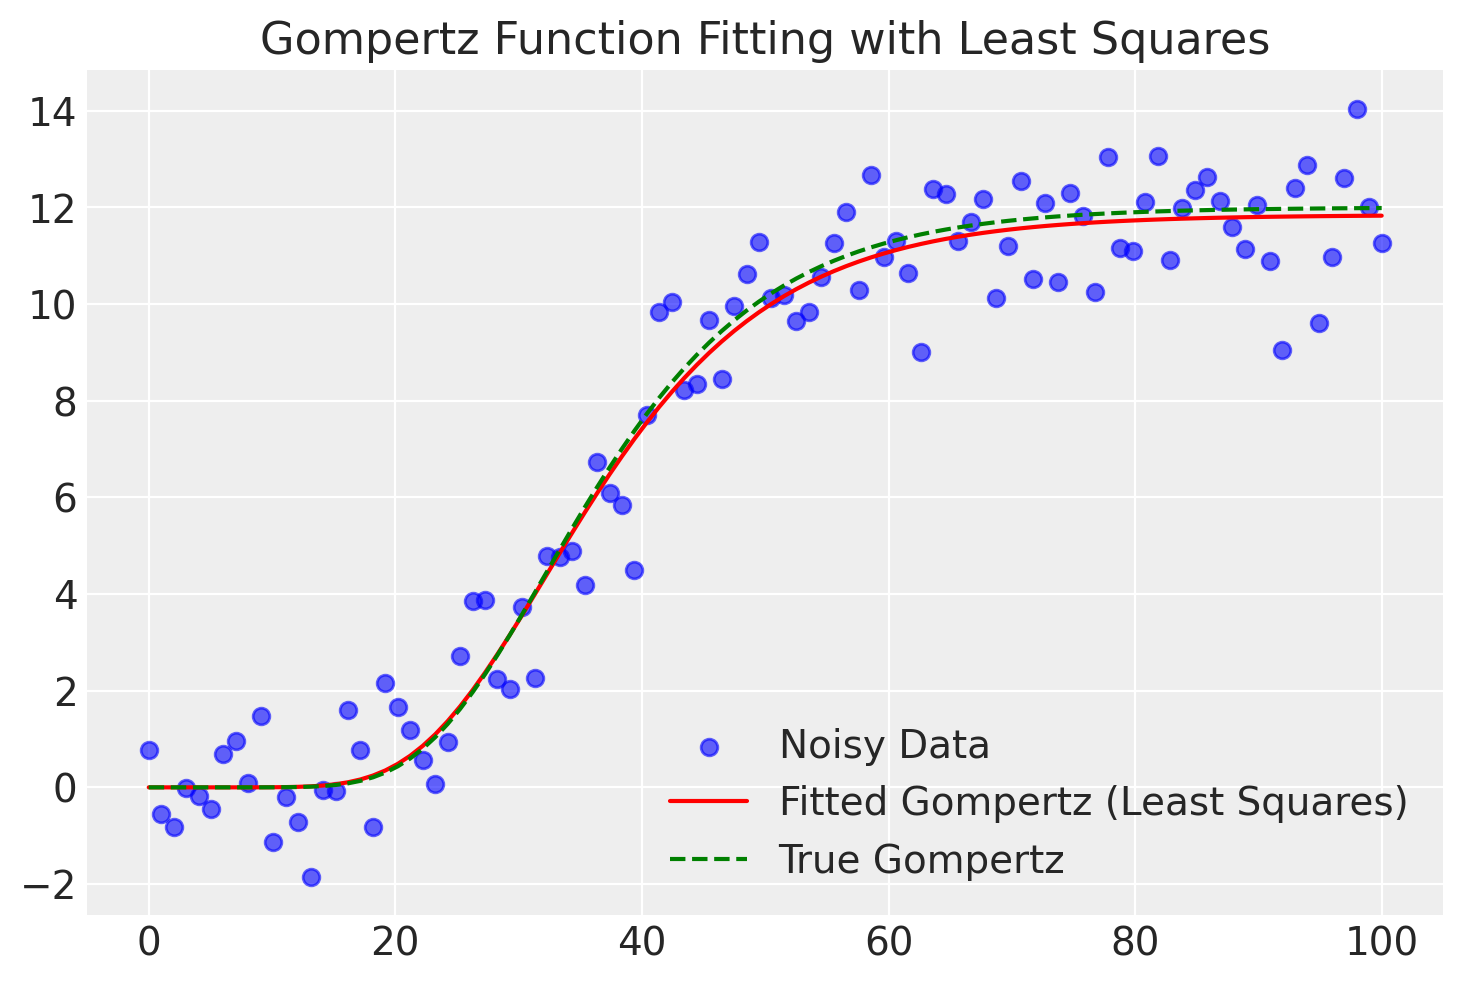

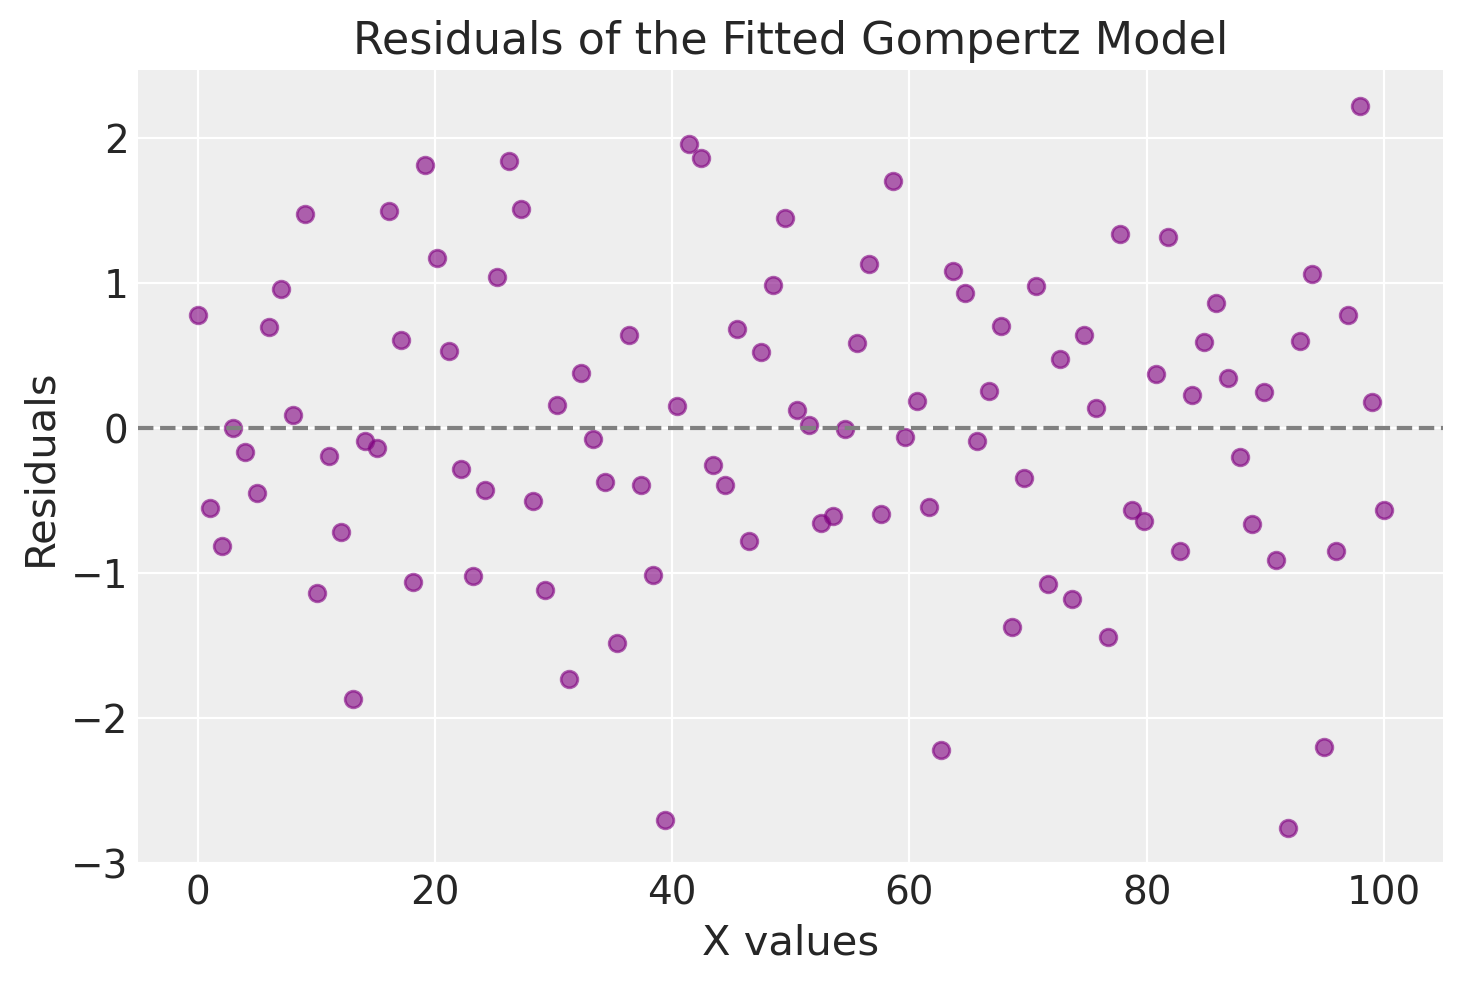

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Gompertz function
def gomp(a, b, c, x):
    y_i = a * np.exp(-b * np.exp(-c * x))
    return y_i

# Least Squares function (to minimize)
def least_squares(parameters, x, y_obs):
    a, b, c = parameters  # No need for sigma in least squares
    y_pred = gomp(a, b, c, x)
    # Sum of squared residuals
    ls = np.sum((y_obs - y_pred) ** 2)
    return ls

# Generate some arbitrary noisy Gompertz data
x_values = np.linspace(0, 100, 100)
aa, bb, cc = 12, 25, 0.1  # True values for a, b, c
yy = gomp(aa, bb, cc, x_values)  # True Gompertz function
noise = np.random.normal(0, 1, size=len(x_values))  # Add some noise
y_values = yy + noise  # Noisy observations

# Initial guess for [a, b, c]
initial_guess = [10, 15, 0.05]  # No sigma for least squares

# Perform least squares optimization
result = minimize(least_squares, initial_guess, args=(x_values, y_values), method='L-BFGS-B')

# Extract fitted parameters
a_ls, b_ls, c_ls = result.x
print(f"Least Squares estimates: a={a_ls}, b={b_ls}, c={c_ls}")

# Calculate residuals
y_pred = gomp(a_ls, b_ls, c_ls, x_values)
residuals = y_values - y_pred

# Plot the noisy data and the fitted Gompertz curve
plt.scatter(x_values, y_values, label="Noisy Data", color="blue", alpha=0.6)
plt.plot(x_values, gomp(a_ls, b_ls, c_ls, x_values), color='red', label="Fitted Gompertz (Least Squares)")
plt.plot(x_values, yy, color='green', linestyle='--', label="True Gompertz")
plt.legend()
plt.title("Gompertz Function Fitting with Least Squares")
plt.show()

# Plot residuals
plt.scatter(x_values, residuals, color="purple", alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residuals of the Fitted Gompertz Model")
plt.xlabel("X values")
plt.ylabel("Residuals")
plt.show()


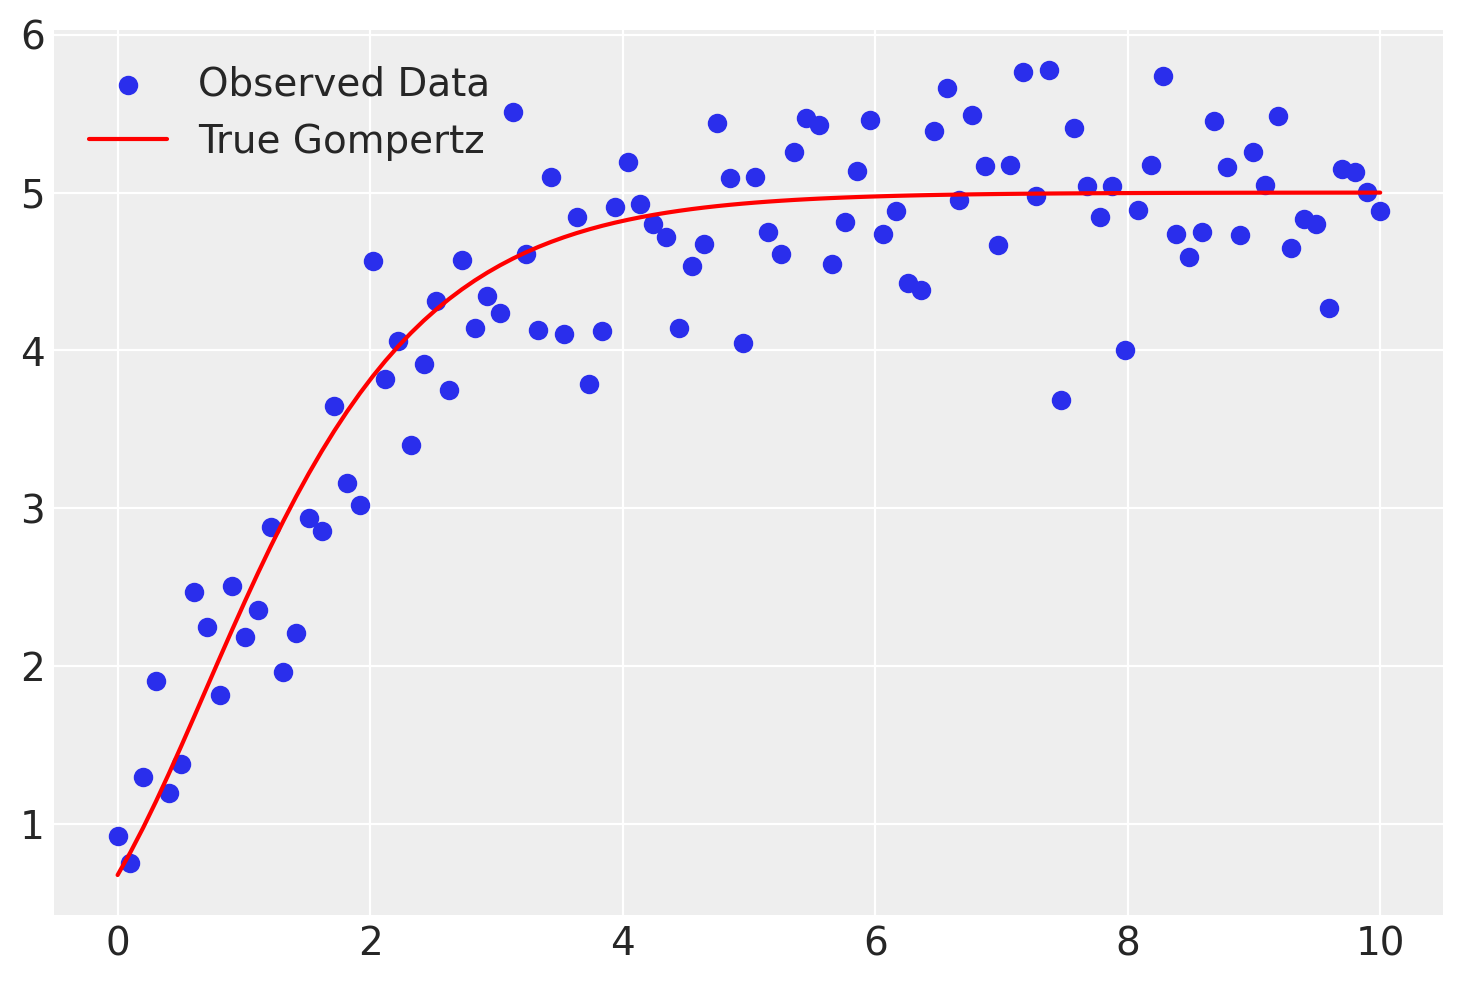

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, c, sigma]


c:\Users\g7712_razer2\miniconda3\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


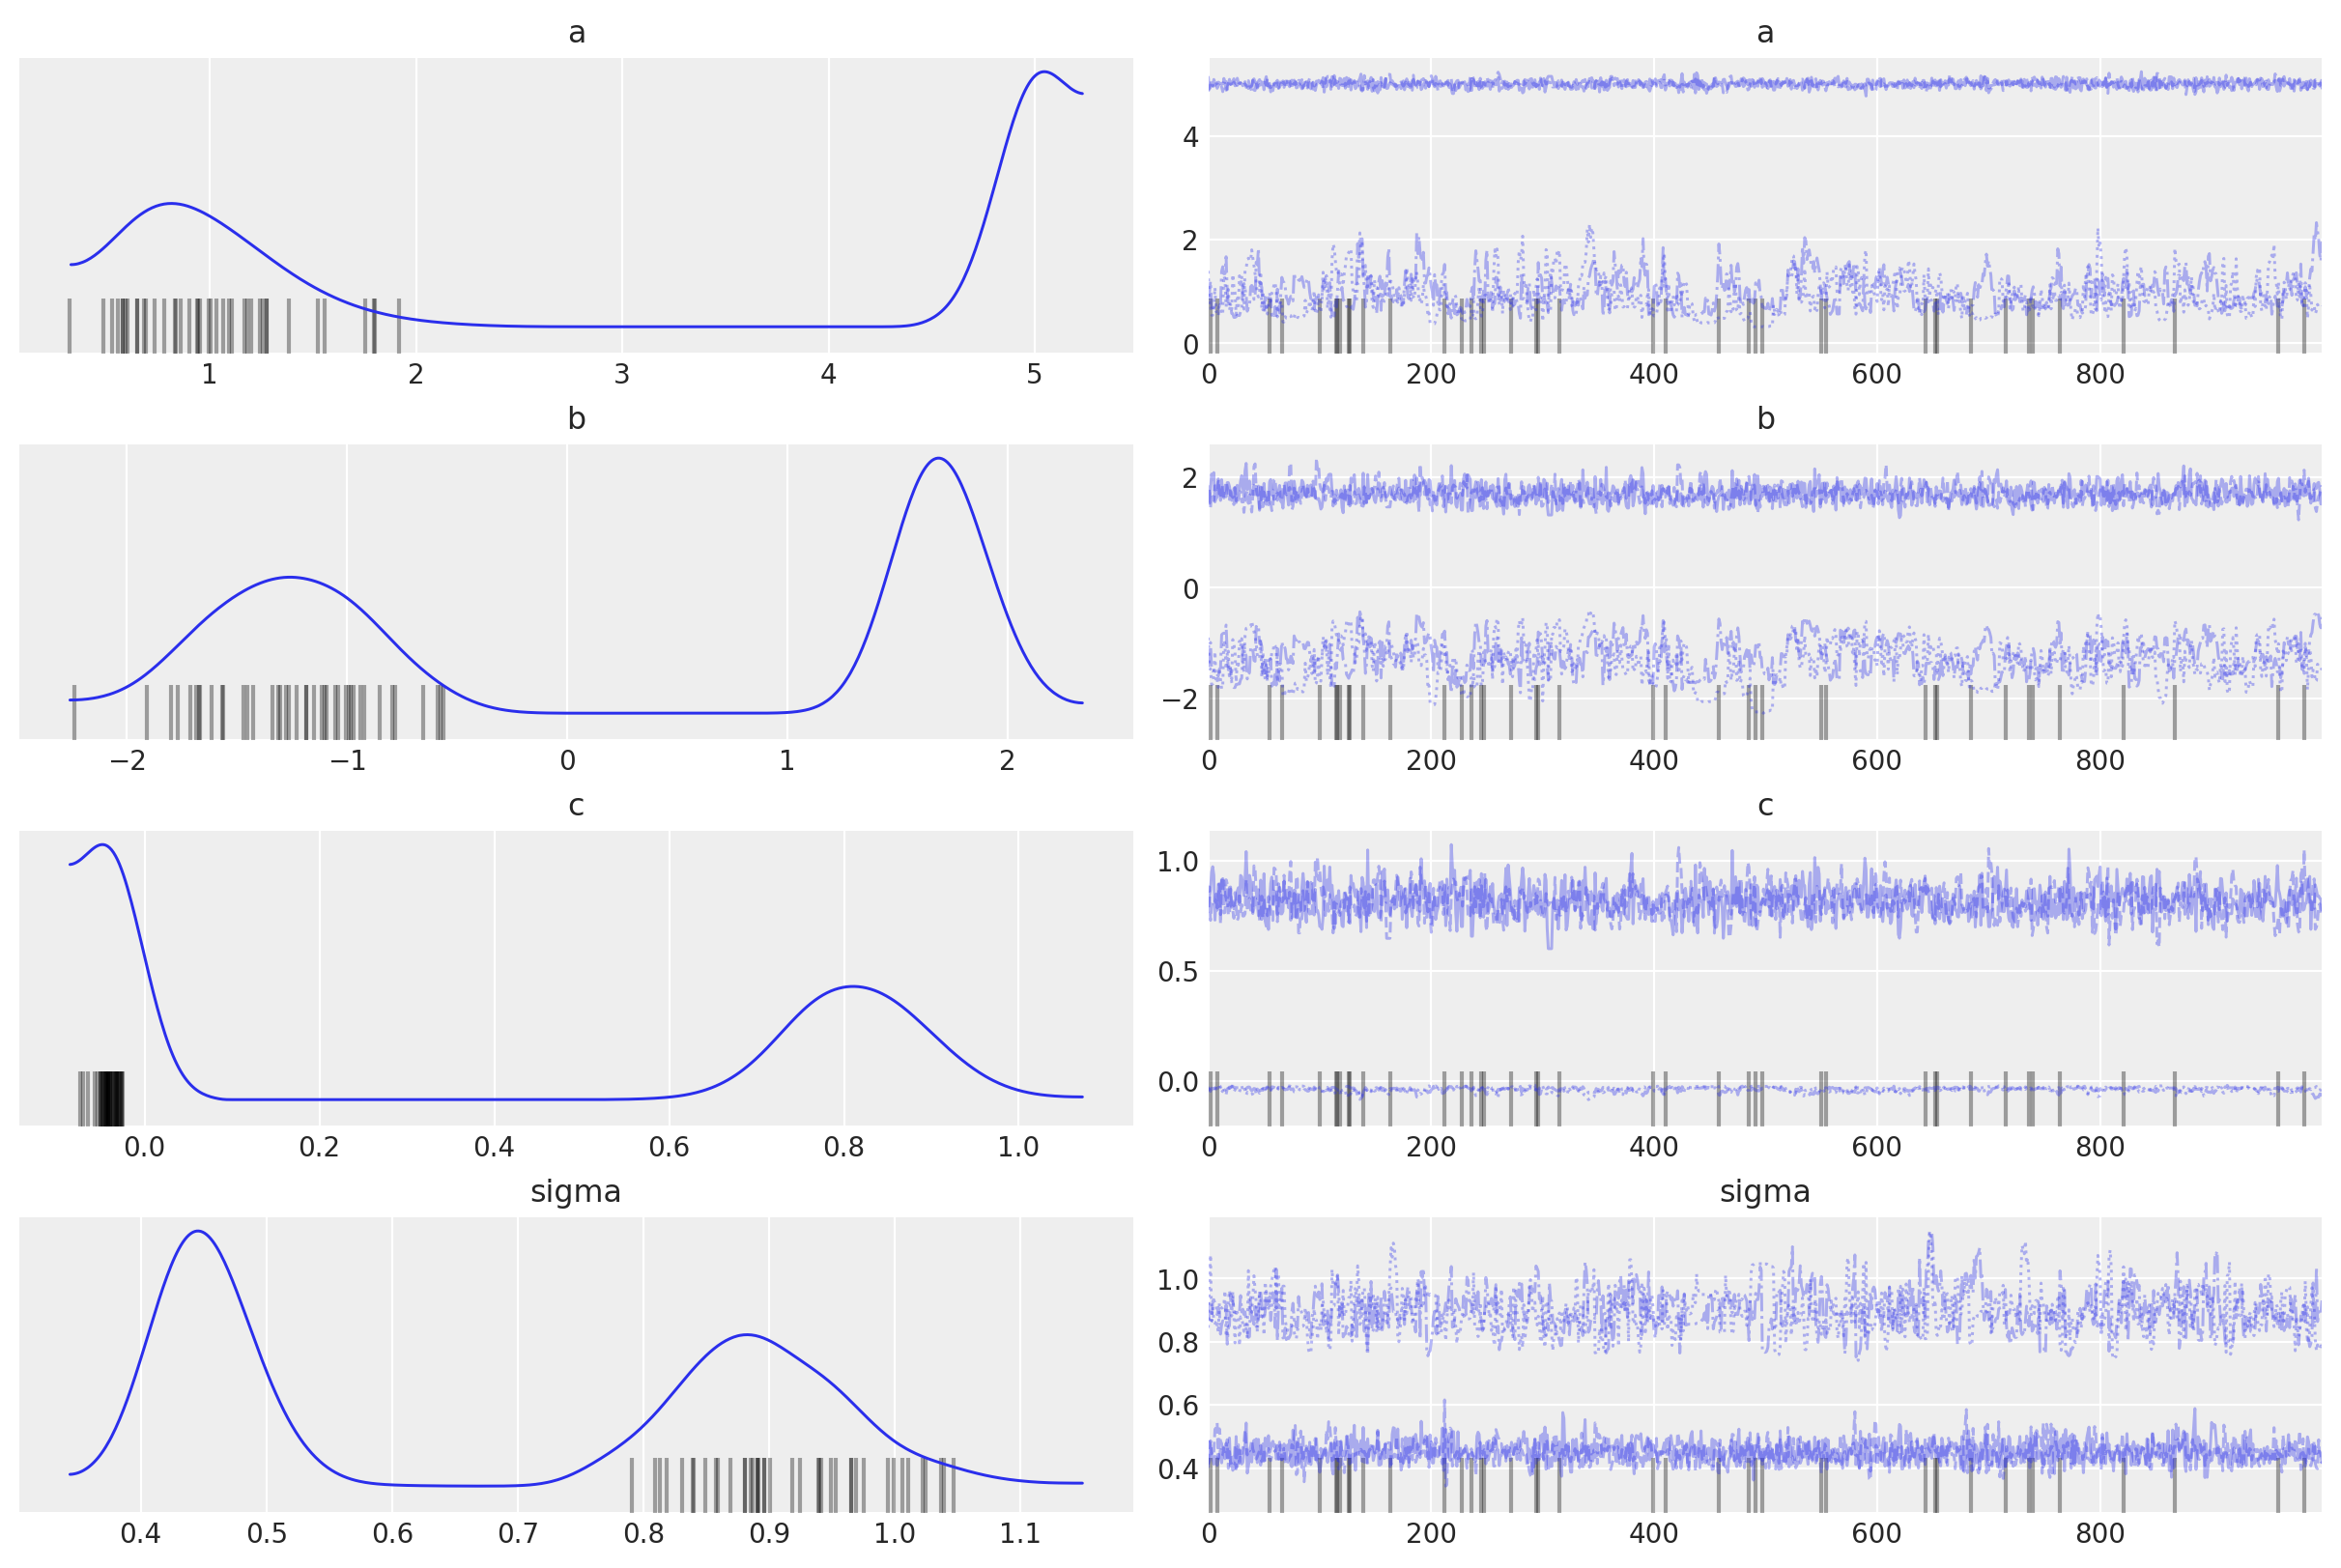

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (with some noise)
np.random.seed(42)
x = np.linspace(0, 10, 100)  # arbitraty features
a_true, b_true, c_true = 5.0, 2.0, 1.0  # True parameters for the Gompertz function
y_true = a_true * np.exp(-b_true * np.exp(-c_true * x))  # True Gompertz curve
y_obs = y_true + np.random.normal(0, 0.5, size=len(x))  

# Plot the true Gompertz curve and noisy observations
plt.scatter(x, y_obs, label="Observed Data")
plt.plot(x, y_true, color='r', label="True Gompertz")
plt.legend()
plt.show()

## define structure of model ##
# instantiate a probabilistic model with priors on a b c and a likelihood (relationship between a b c and observed data)
with pm.Model() as gomp:

    # Priors for unknown parameters
    a = pm.Normal('a', mu=0, sigma=1)
    b = pm.Normal('b', mu=0, sigma=1)
    c = pm.Normal('c', mu=0, sigma=1)
    gomp_ = a * pm.math.exp(-b * pm.math.exp(-c * x))
    
    ### define likelihood
    noise = pm.HalfNormal('sigma', sigma=1)  
    likelihood = pm.Normal('y_obs', mu=gomp_, sigma=noise, observed=y_obs)
    
with gomp:
    # draw 1000 posterior samples
    idata = pm.sample()
# plot
az.plot_trace(idata, combined=True);

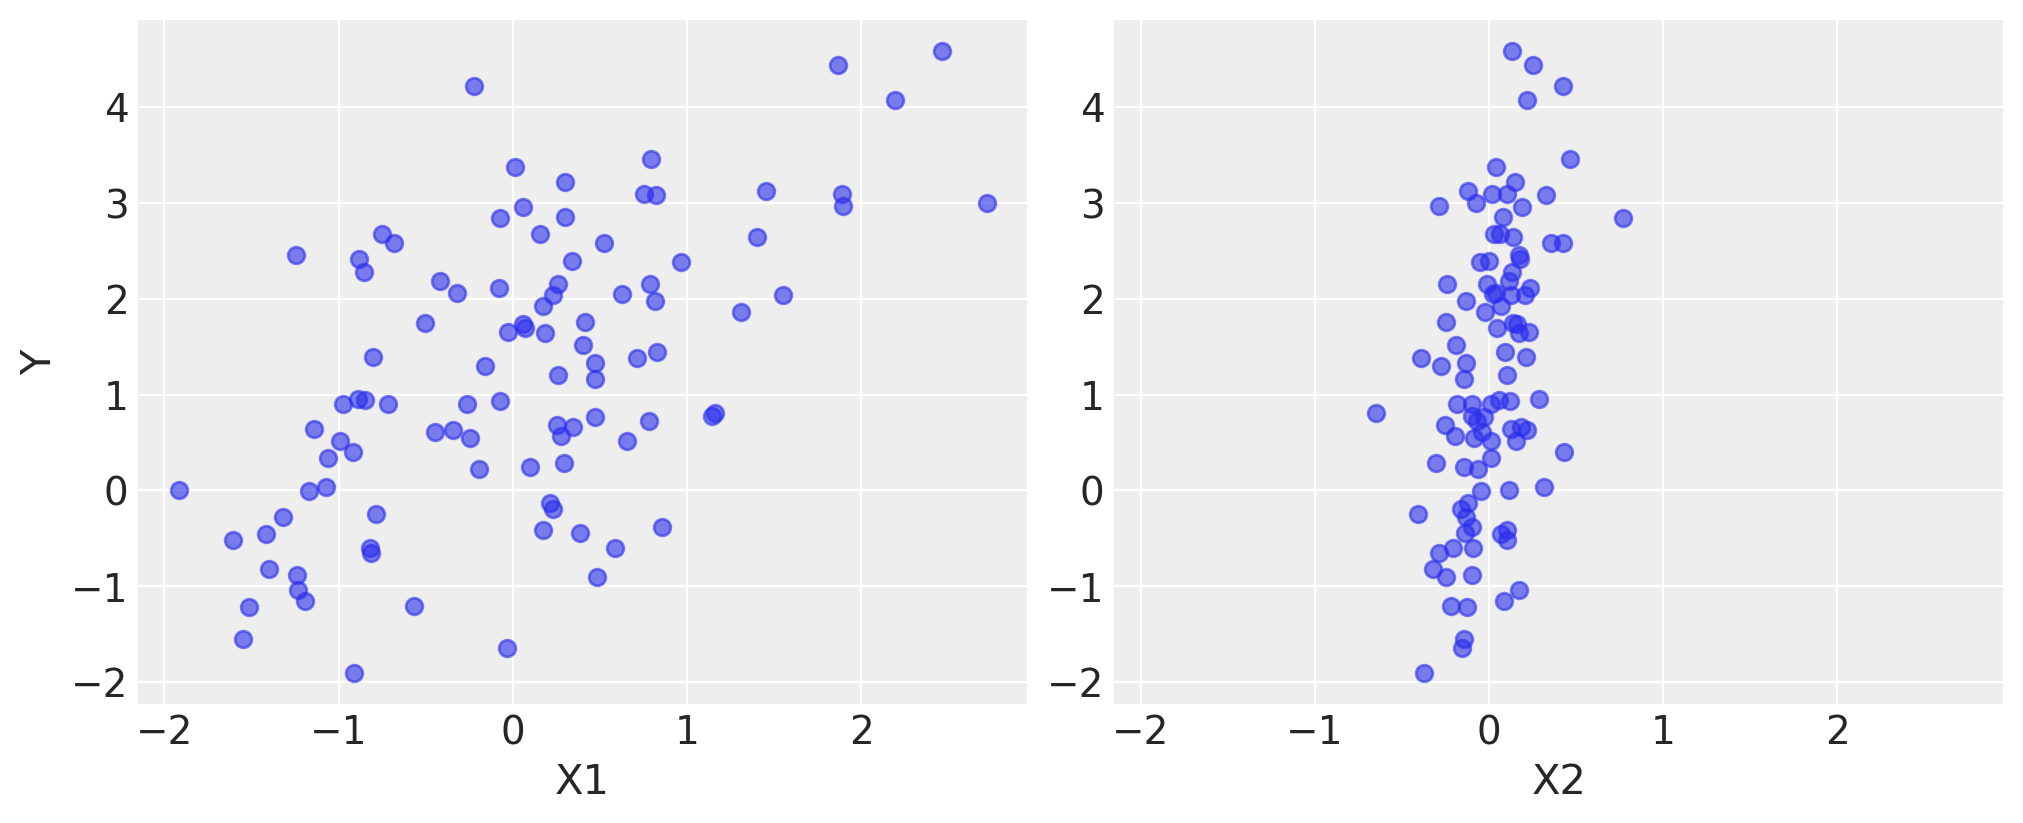

In [61]:
##### PYMC TUTORIAL
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")


# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2")

basic_model = pm.Model()

# model object is a container for random vars
# with statement is a context manager
with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)